In [1]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
from models import Logistic
from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [2]:
# TRAINING = 0.6 indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [3]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [4]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Logistic Classifier

The Logistic Classifier has 2 hyperparameters that you can experiment with:
- **Learning rate** - controls how much we change the current weights of the classifier during each update. We set it at a default value of 0.5, but you should experiment with different values. We recommend changing the learning rate by factors of 10 and observing how the performance of the classifier changes. You should also try adding a **decay** which slowly reduces the learning rate over each epoch.
- **Number of Epochs** - An epoch is a complete iterative pass over all of the data in the dataset. During an epoch we predict a label using the classifier and then update the weights of the classifier according to the logistic regression update rule for each sample in the training set. You should try different values for the number of training epochs and report your results.

You will implement the Logistic Classifier in the **models/logistic.py**

The following code: 
- Creates an instance of the Logistic classifier class 
- The train function of the Logistic class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

### Training Logistic Classifer

In [6]:
learning_rate = 0.05
n_epochs = 1000

lr = Logistic(learning_rate, n_epochs)
lr.train(X_train_MR, y_train_MR)

In [7]:
pred_lr = lr.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_lr, y_train_MR)))

The training accuracy is given by: 93.331966


### Validate Logistic Classifer

In [8]:
pred_lr = lr.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_lr, y_val_MR)))

The validation accuracy is given by: 93.292308


### Test Logistic Classifier

In [9]:
pred_lr = lr.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_lr, y_test_MR)))

The testing accuracy is given by: 91.815385


0 100
1 115
2 132
3 152
4 175
5 202
6 232
7 268
8 308
9 355
10 409
11 471
12 542
13 625
14 719
15 828
16 954
17 1098
18 1264
19 1456
20 1676
21 1930
22 2222
23 2559
24 2947
25 3393
26 3906
27 4498
28 5179
29 5963
30 6866
31 7906
32 9102
33 10481
34 12067
35 13894
36 15998
37 18420
38 21209
39 24420
40 28117
41 32374
42 37275
43 42919
44 49417
45 56898
46 65512
47 75431
48 86851
49 100000


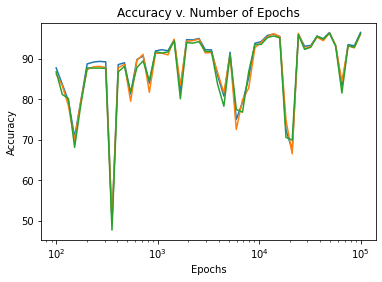

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Accuracy v. Number of Epochs")
ax.set_xlabel("Epochs")
ax.set_ylabel("Accuracy")

epoch_steps = np.logspace(np.log10(100), np.log10(100000), num=50, dtype="int64")
accuracies = []
for i, epoch_step in enumerate(epoch_steps):
    lr = Logistic(learning_rate, epoch_step)
    lr.train(X_train_MR, y_train_MR)
    accuracies.append(
        (
            get_acc(lr.predict(X_train_MR), y_train_MR),
            get_acc(lr.predict(X_val_MR), y_val_MR),
            get_acc(lr.predict(X_test_MR), y_test_MR)
        )
    )
    print(i, epoch_step)
ax.set_xscale("log")
ax.plot(epoch_steps, [y[0] for y in accuracies], label = "Training")
ax.plot(epoch_steps, [y[1] for y in accuracies], label = "Validation")
ax.plot(epoch_steps, [y[2] for y in accuracies], label = "Testing")

0 1e-05
1 1.2067926406393289e-05
2 1.4563484775012445e-05
3 1.757510624854793e-05
4 2.1209508879201926e-05
5 2.559547922699533e-05
6 3.0888435964774785e-05
7 3.727593720314938e-05
8 4.498432668969444e-05
9 5.4286754393238594e-05
10 6.55128556859551e-05
11 7.906043210907701e-05
12 9.540954763499944e-05
13 0.00011513953993264469
14 0.00013894954943731373
15 0.00016768329368110067
16 0.00020235896477251554
17 0.000244205309454865
18 0.00029470517025518097
19 0.00035564803062231287
20 0.00042919342601287783
21 0.0005179474679231213
22 0.0006250551925273969
23 0.0007543120063354615
24 0.0009102981779915217
25 0.0010985411419875584
26 0.0013257113655901081
27 0.0015998587196060573
28 0.0019306977288832496
29 0.002329951810515372
30 0.002811768697974228
31 0.0033932217718953264
32 0.004094915062380423
33 0.004941713361323833
34 0.005963623316594642
35 0.007196856730011514
36 0.00868511373751352
37 0.010481131341546853
38 0.012648552168552958
39 0.015264179671752318
40 0.018420699693267144


/home/whumphlett/personal/COMP-5630/A4-Logistic-Regression/logistic_regression/models/logistic.py:28: RuntimeWarning: overflow encountered in exp
  return 1. / (1 + np.exp(-z))


41 0.022229964825261933
42 0.026826957952797246
43 0.032374575428176434
44 0.039069399370546126
45 0.047148663634573894
46 0.05689866029018293
47 0.06866488450042998
48 0.08286427728546843
49 0.1


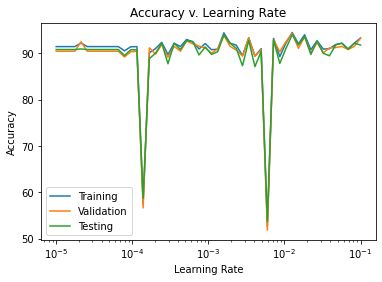

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title("Accuracy v. Learning Rate")
ax.set_xlabel("Learning Rate")
ax.set_ylabel("Accuracy")

learning_steps = np.logspace(np.log10(.00001), np.log10(.1), num=50)
accuracies = []
for i, learning_step in enumerate(learning_steps):
    lr = Logistic(learning_step, n_epochs)
    lr.train(X_train_MR, y_train_MR)
    accuracies.append(
        (
            get_acc(lr.predict(X_train_MR), y_train_MR),
            get_acc(lr.predict(X_val_MR), y_val_MR),
            get_acc(lr.predict(X_test_MR), y_test_MR)
        )
    )
    print(i, learning_step)
ax.set_xscale("log")
ax.plot(learning_steps, [y[0] for y in accuracies], label = "Training")
ax.plot(learning_steps, [y[1] for y in accuracies], label = "Validation")
ax.plot(learning_steps, [y[2] for y in accuracies], label = "Testing")
ax.legend()